In [ ]:
!pip install country_converter
!pip install pycountry
!pip install pycountry_convert

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry
import geopandas as gpd
import pycountry_convert as pc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import country_converter as coco
from matplotlib.colors import ListedColormap
from google.colab import files
from tabulate import tabulate
from country_converter import CountryConverter

In [ ]:
df_covid = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
df_covid.loc[260,'Country/Region'] = 'United States of America'
df_covid.to_csv('/content/time_series_covid19_confirmed_global1.csv', index=False)
df_covid2 = pd.read_csv('/content/time_series_covid19_confirmed_global1.csv')
df_covid2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [ ]:
df_covid2 = df_covid.replace(np.nan,'null')
df_covid2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,null,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,null,Albania,41.1533,20.1683,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,null,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,null,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,null,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,null,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,null,Winter Olympics 2022,39.9042,116.4074,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,null,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,null,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [ ]:
def country_to_continent(country_name):
    continent_name = coco.convert(names=country_name, to='continent')
    return continent_name

df_covid2['Continent'] = df_covid2['Country/Region'].apply(country_to_continent)

df_covid2

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Continent
0,null,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,Asia
1,null,Albania,41.1533,20.1683,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,Europe
2,null,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,Africa
3,null,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,Europe
4,null,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,null,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,Asia
285,null,Winter Olympics 2022,39.9042,116.4074,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,not found
286,null,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,Asia
287,null,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,Africa


In [ ]:
# Obtener la última columna del DataFrame (correspondiente a la última fecha)
ultima_columna = df_covid2.iloc[:, -2]

# Crear un nuevo DataFrame con la información requerida
result_df = pd.DataFrame({'Country': df_covid2['Country/Region'], 'Cases': ultima_columna})

# Guardar el DataFrame en formato CSV
result_df.to_csv('output.csv', index=False)

In [ ]:
df_acumulado = pd.read_csv('/content/output.csv')
df_acumulado

,Country,Cases
0,Afghanistan,209451
1,Albania,334457
2,Algeria,271496
3,Andorra,47890
4,Angola,105288
...,...,...
284,West Bank and Gaza,703228
285,Winter Olympics 2022,535
286,Yemen,11945
287,Zambia,343135


In [ ]:
columns = ['index', 'Country', 'Cases']

df_acumulado = pd.DataFrame(df_acumulado, columns=columns)

# Agrupar por país y sumar los casos para cada país
df_grouped = df_acumulado.groupby('Country', as_index=False)['Cases'].sum()

# Guardar el DataFrame en formato CSV
df_grouped.to_csv('simplified.csv', index=False)

                  Country   Cases
0             Afghanistan  209451
1                 Albania  334457
2                 Algeria  271496
3                 Andorra   47890
4                  Angola  105288
..                    ...     ...
196    West Bank and Gaza  703228
197  Winter Olympics 2022     535
198                 Yemen   11945
199                Zambia  343135
200              Zimbabwe  264276

[201 rows x 2 columns]


<ipython-input-213-9c86ac48aba7>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


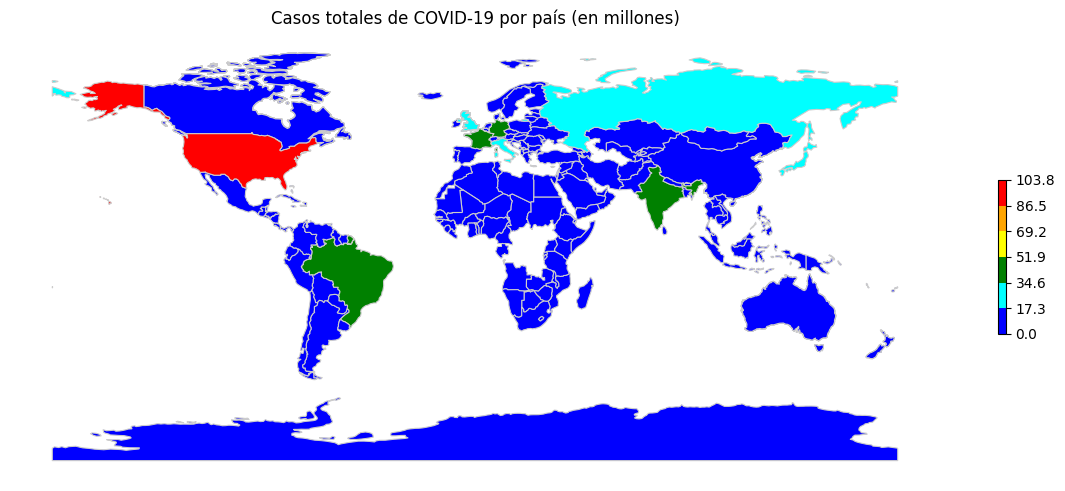

In [ ]:
# Define una nueva paleta de colores
cmap = ListedColormap(['blue', 'cyan', 'green', 'yellow', 'orange', 'red'])

#Cargamos el mapa del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unimos el DataFrame de casos de COVID-19 con el mapa del mundo
merged = world.set_index('name').join(df_acumulado.set_index('Country'))

# Convertimos los casos a millones
merged['Cases'] = merged['Cases'] / 1e6

# Dibujamos el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Usamos la nueva paleta de colores y una descripción con más intervalos
merged.plot(column='Cases', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.2, 'ticks': np.linspace(merged['Cases'].min(), merged['Cases'].max(), 7)})

# Eliminamos los números de los ejes
ax.axis('off')

plt.title('Casos totales de COVID-19 por país (en millones)')
plt.show()

In [ ]:
df_simplified = pd.read_csv('/content/simplified.csv')
df_simplified

,Country,Cases
0,Afghanistan,209451
1,Albania,334457
2,Algeria,271496
3,Andorra,47890
4,Angola,105288
...,...,...
196,West Bank and Gaza,703228
197,Winter Olympics 2022,535
198,Yemen,11945
199,Zambia,343135



Tabla para el continente Africa:



<ipython-input-154-29041f3e68f5>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table.style.hide_index())


Country,Cases
Algeria,271496
Angola,105288
Benin,27999
Botswana,329758
Burkina Faso,22056
Burundi,53631
Cabo Verde,63244
Cameroon,124392
Central African Republic,15368
Chad,7679


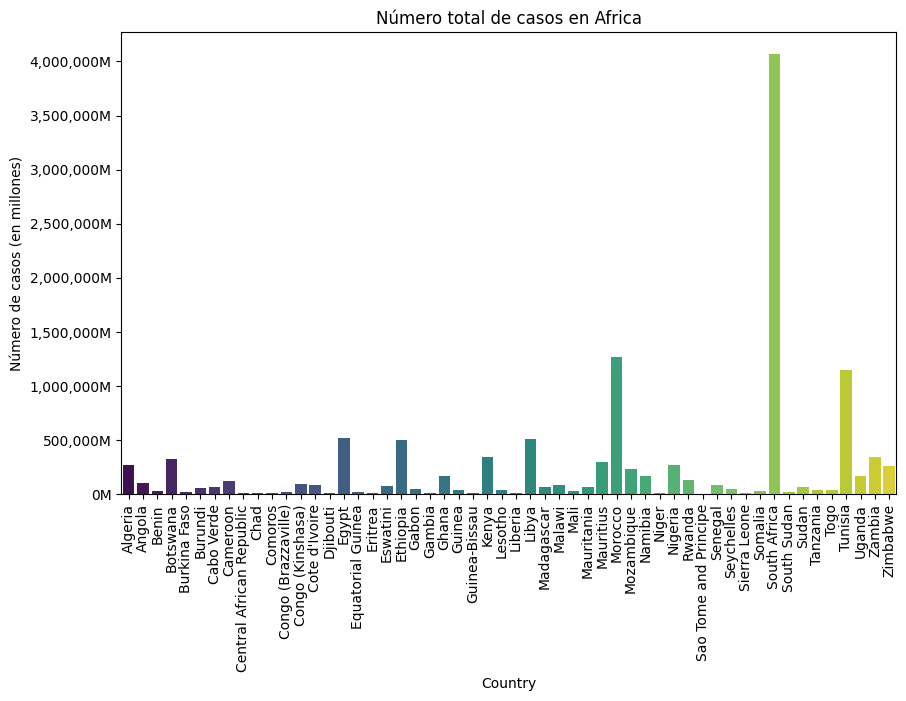


Tabla para el continente America:



<ipython-input-154-29041f3e68f5>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table.style.hide_index())


Country,Cases
Antigua and Barbuda,9106
Argentina,10044957
Bahamas,37491
Barbados,106798
Belize,70757
Bolivia,1194277
Brazil,37076053
Canada,4617095
Chile,5192286
Colombia,6359093


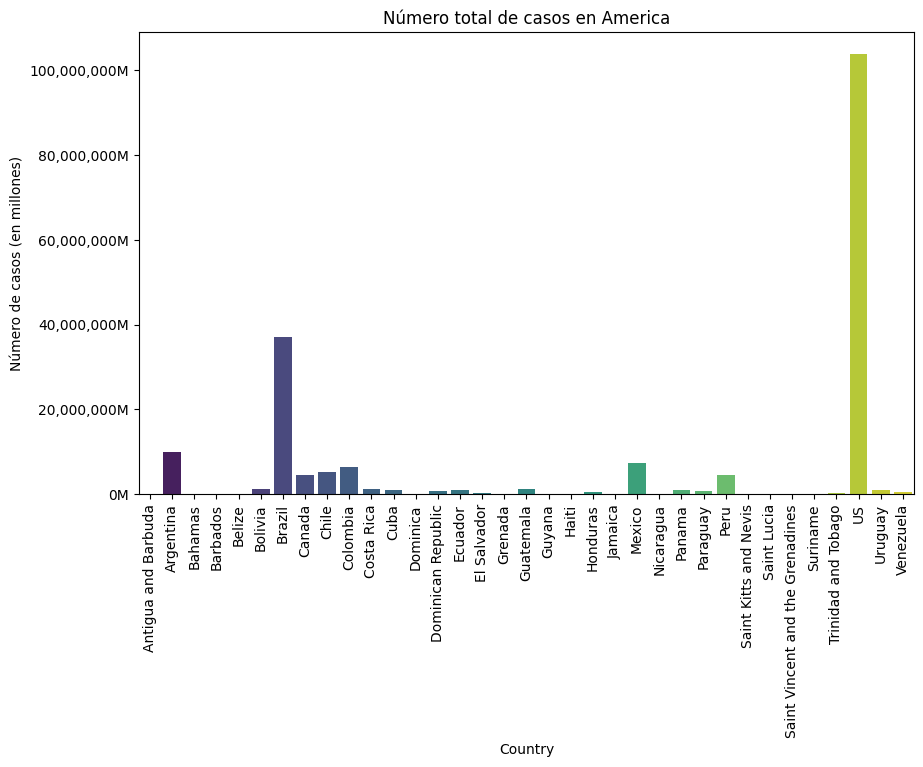


Tabla para el continente Antarctica:



<ipython-input-154-29041f3e68f5>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table.style.hide_index())


Country,Cases
Antarctica,11


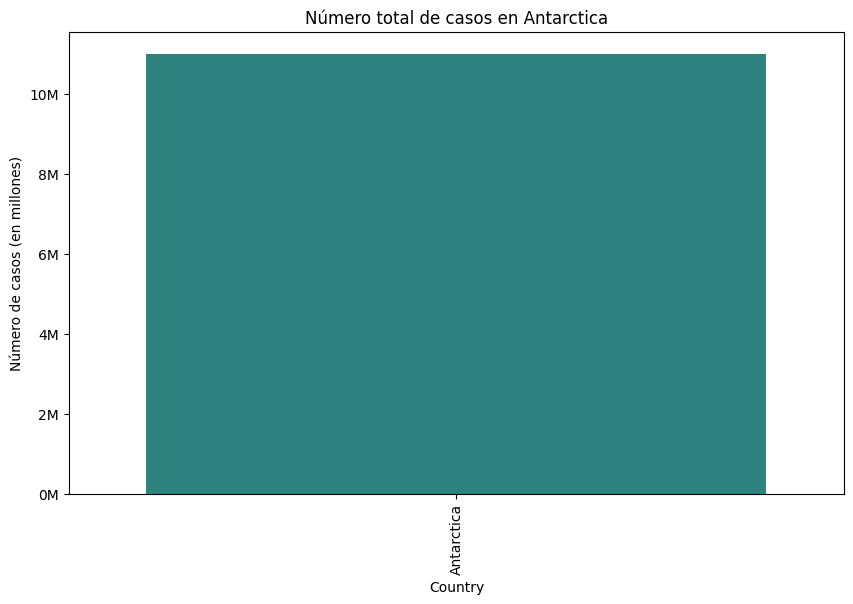


Tabla para el continente Asia:



<ipython-input-154-29041f3e68f5>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table.style.hide_index())


Country,Cases
Afghanistan,209451
Armenia,447308
Azerbaijan,828825
Bahrain,710693
Bangladesh,2037871
Bhutan,62627
Brunei,279661
Burma,633950
Cambodia,138719
China,4903524


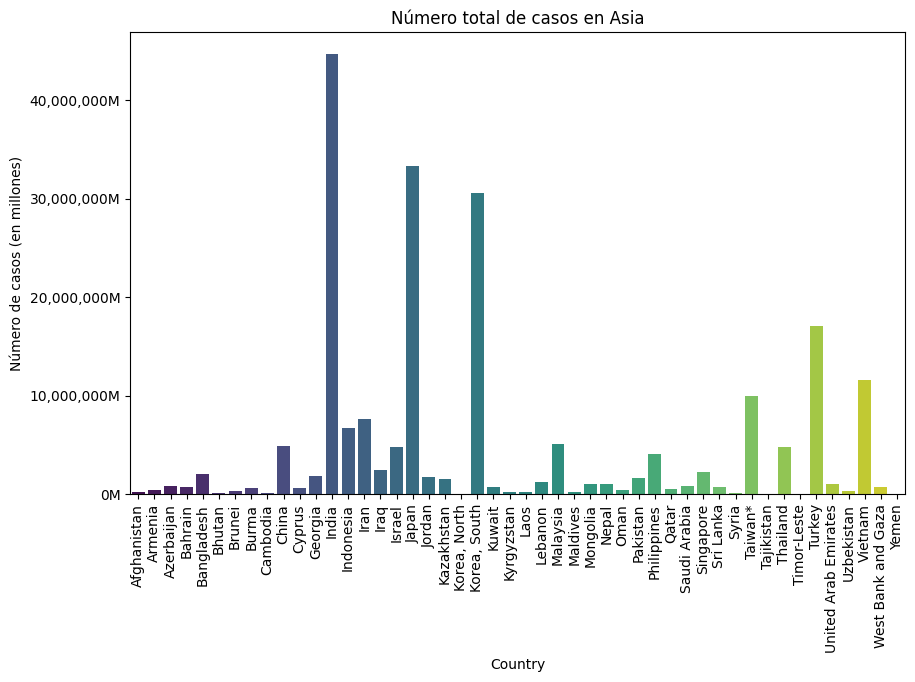


Tabla para el continente Europe:



<ipython-input-154-29041f3e68f5>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table.style.hide_index())


Country,Cases
Albania,334457
Andorra,47890
Austria,5961143
Belarus,994037
Belgium,4739365
Bosnia and Herzegovina,401729
Bulgaria,1297523
Croatia,1269326
Czechia,4618256
Denmark,3451036


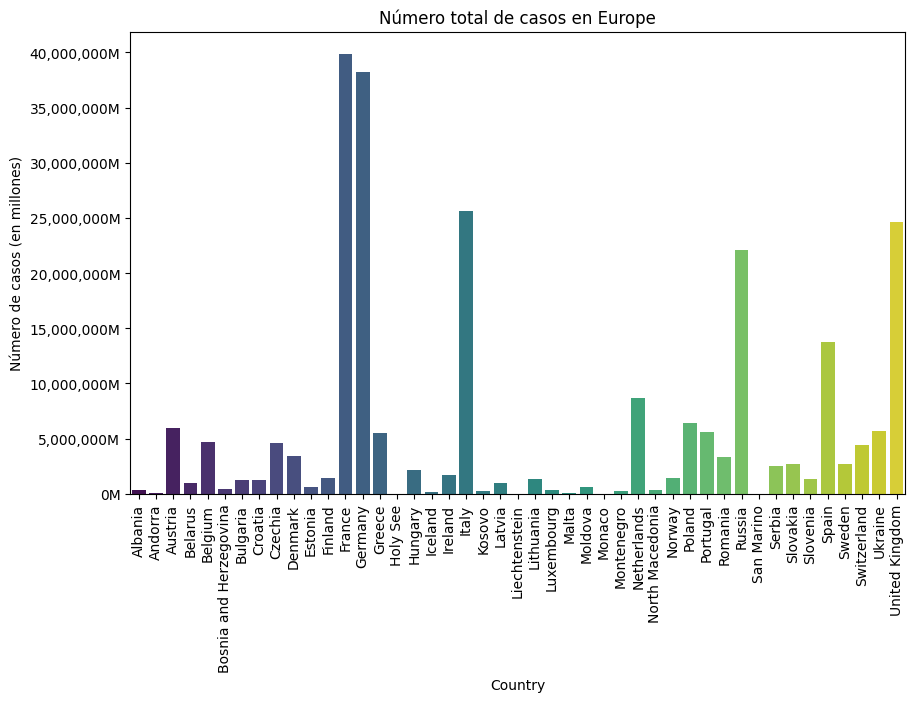


Tabla para el continente Oceania:



<ipython-input-154-29041f3e68f5>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table.style.hide_index())


Country,Cases
Australia,11399460
Fiji,68898
Kiribati,5014
Marshall Islands,15649
Micronesia,23948
Nauru,5247
New Zealand,2236114
Palau,5991
Papua New Guinea,46825
Samoa,16607


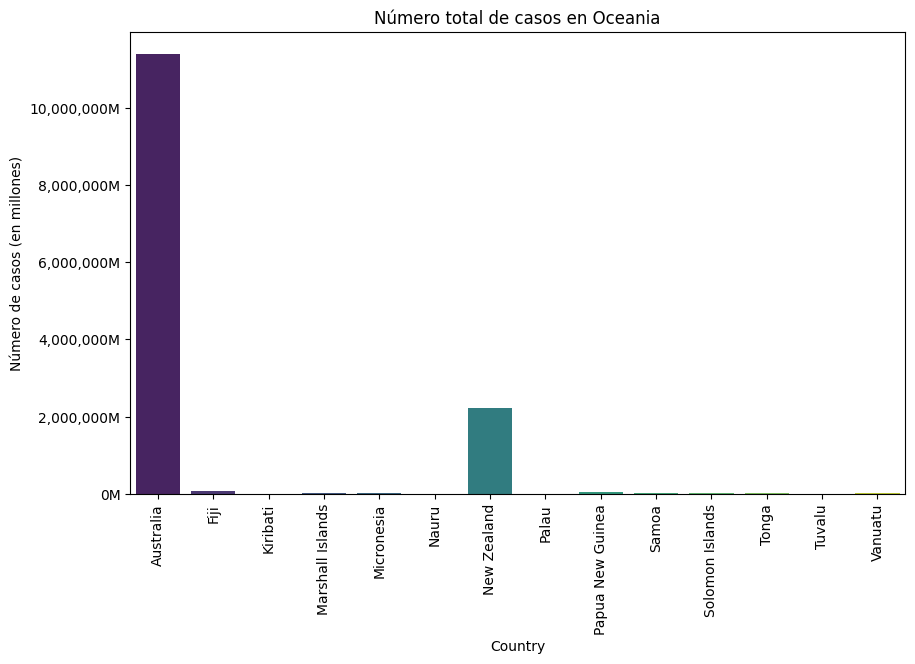


Tabla para el continente not found:



<ipython-input-154-29041f3e68f5>:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(table.style.hide_index())


Country,Cases
Diamond Princess,712
MS Zaandam,9
Summer Olympics 2020,865
Winter Olympics 2022,535


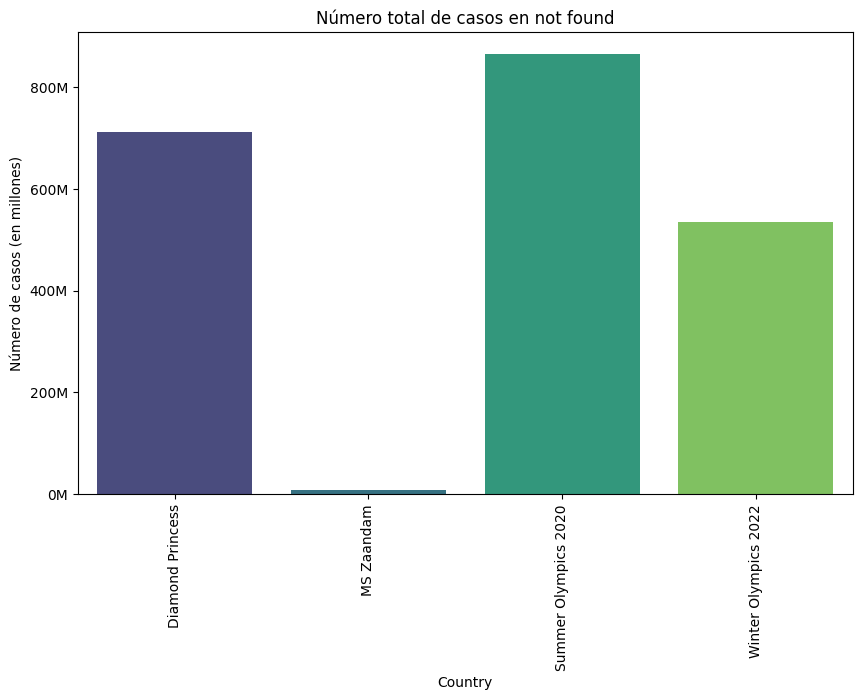

In [ ]:

# Obtener información del continente
df_simplified['Continent'] = df_simplified['Country'].apply(coco.convert, to='continent')

# Crear tablas y gráficos de barras para cada continente
for continent, df_continent in df_simplified.groupby('Continent'):
    table = df_continent[['Country', 'Cases']].reset_index(drop=True)

    # Imprimir la tabla
    print(f"\nTabla para el continente {continent}:\n")
    display(table.style.hide_index())

   # Crear y mostrar el gráfico de barras vertical
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y='Cases', data=table, palette='viridis')  # Sin orient='h' para barras verticales
    plt.title(f'Número total de casos en {continent}')
    plt.ylabel('Número de casos (en millones)')  # Modificar la etiqueta del eje y
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x en 90 grados

    # Cambiar el formato del eje y a millones
    plt.ticklabel_format(axis='y', style='plain')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}M'))

    plt.show()


In [ ]:
print(df_covid1.dtypes)

Province/State    object
Country/Region    object
Lat               object
Long              object
1/22/20            int64
                   ...  
3/6/23             int64
3/7/23             int64
3/8/23             int64
3/9/23             int64
Continent         object
Length: 1148, dtype: object


In [ ]:
selected_columns = df_covid1.columns[5:-1]

# Convert the selected column headers to datetime
df_covid1.columns = [pd.to_datetime(col, format='%m/%d/%y') if col in selected_columns else col for col in df_covid1.columns]

In [ ]:
print(df_covid1.dtypes)

Province/State         object
Country/Region         object
Lat                    object
Long                   object
1/22/20                 int64
                        ...  
2023-03-06 00:00:00     int64
2023-03-07 00:00:00     int64
2023-03-08 00:00:00     int64
2023-03-09 00:00:00     int64
Continent              object
Length: 1148, dtype: object


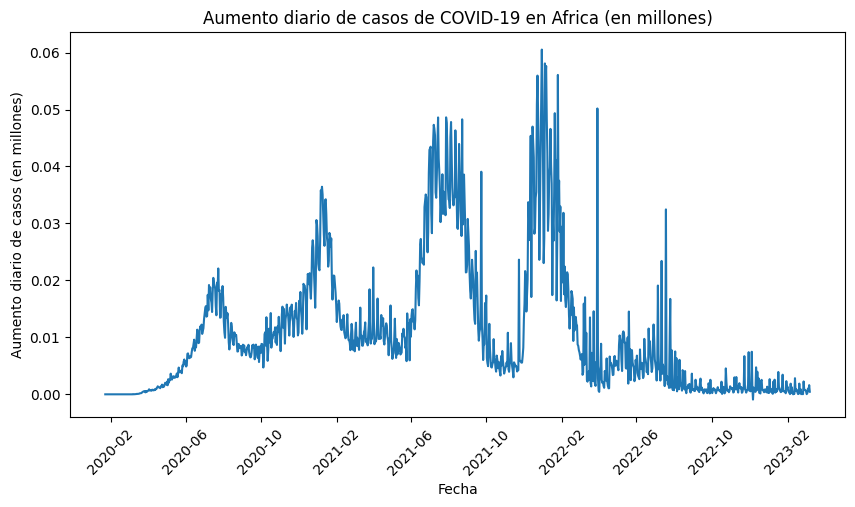

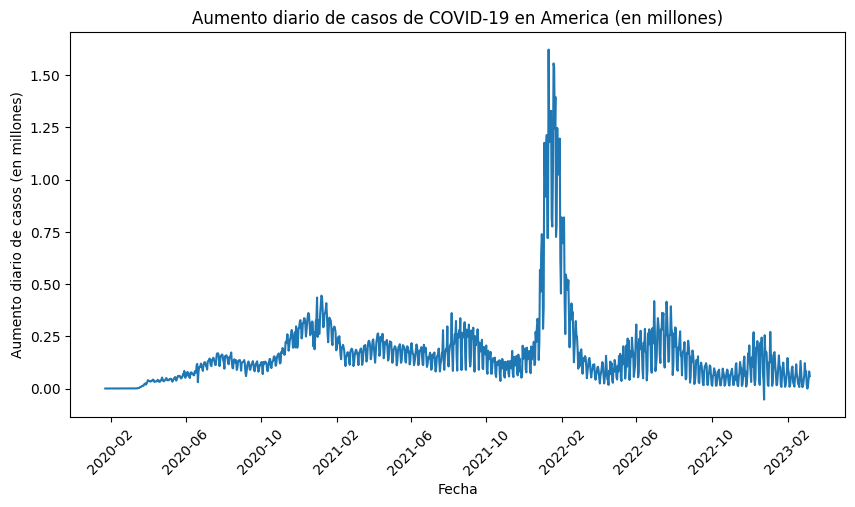

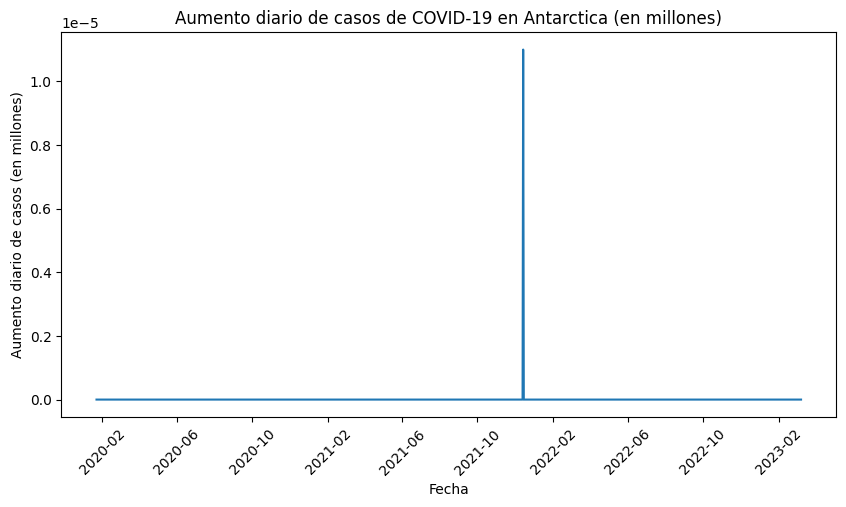

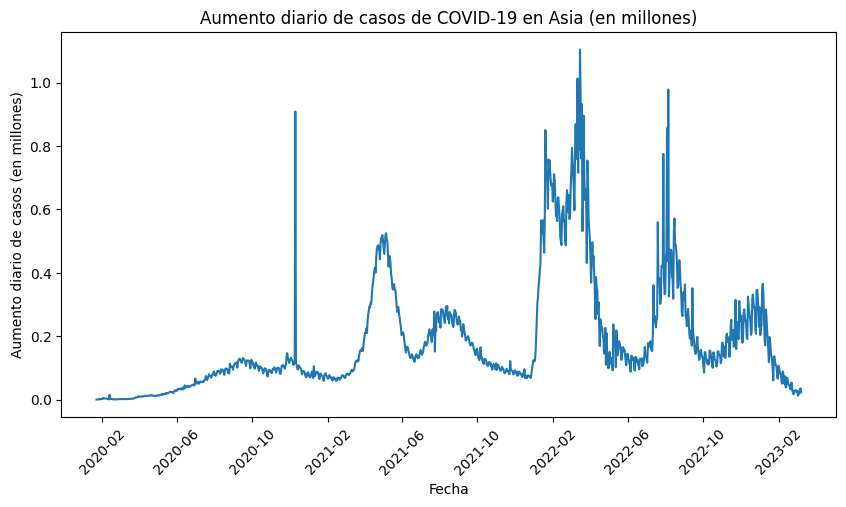

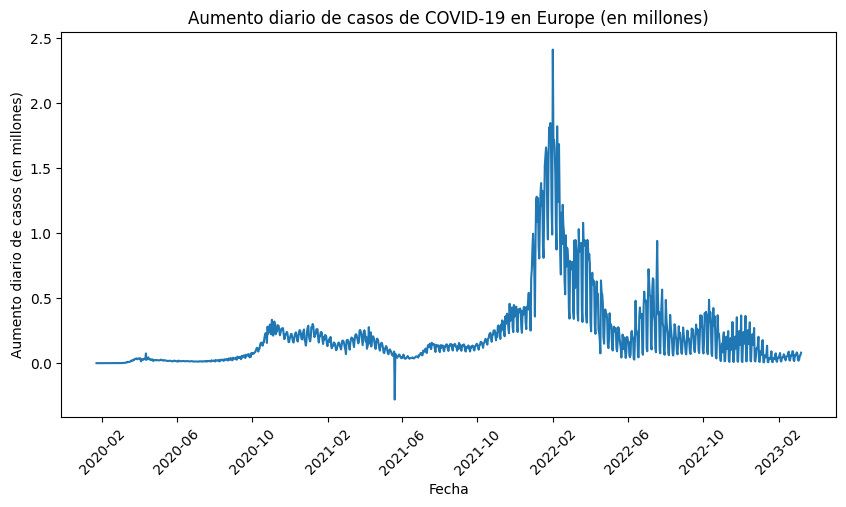

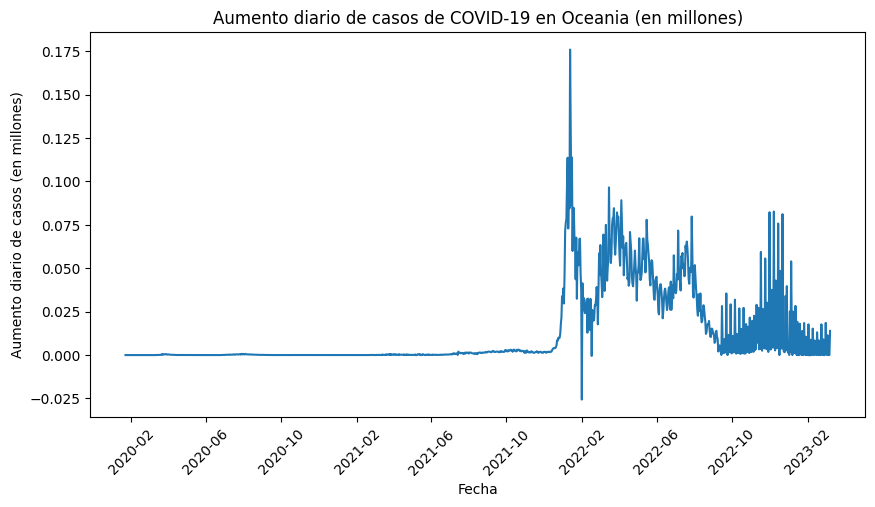

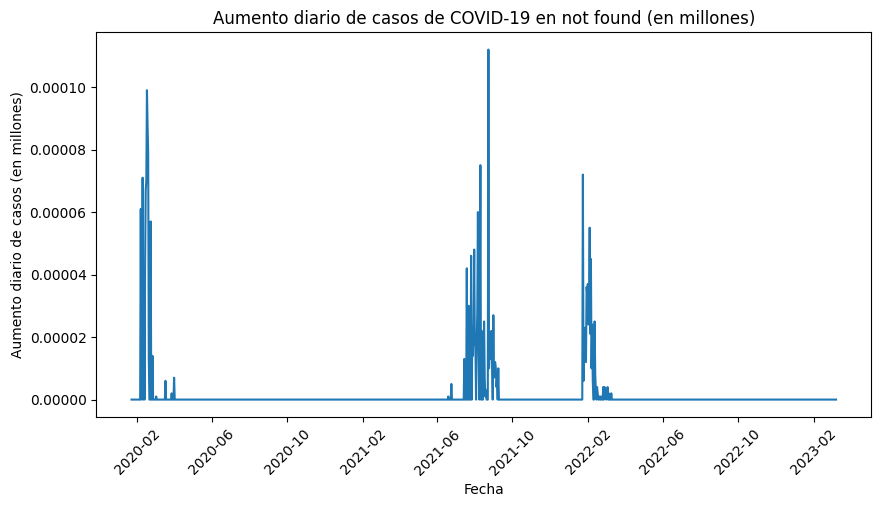

In [ ]:
# Agrupa el dataframe por continente
grouped = df_covid1.groupby('Continent')

# Para cada continente en el dataframe agrupado
for continent, df in grouped:
    # Calcula el aumento diario de casos de COVID-19 en millones
    daily_increase = df.iloc[:, 5:-1].diff(axis=1).sum() / 1_000_000

    # Crea una nueva figura para la gráfica
    fig, ax = plt.subplots(figsize=(10, 5))

    # Dibuja la gráfica del aumento diario de casos de COVID-19
    ax.plot(daily_increase.index, daily_increase.values)

    # Añade un título y etiquetas a los ejes
    ax.set_title(f'Aumento diario de casos de COVID-19 en {continent} (en millones)')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Aumento diario de casos (en millones)')

    # Configura las marcas del eje x para que aparezcan cada 3 meses
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))


    # Rota las etiquetas del eje x para evitar que se solapen
    plt.xticks(rotation=45)

    # Muestra la gráfica
    plt.show()

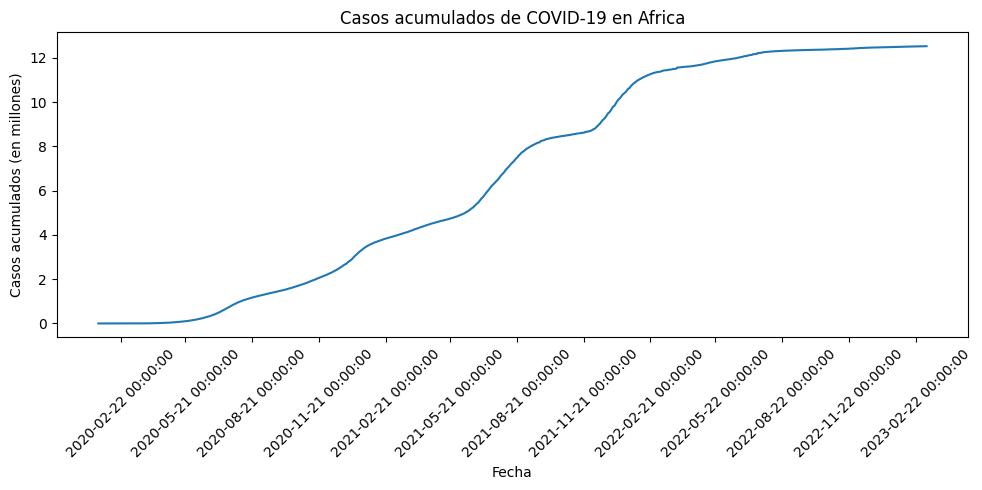

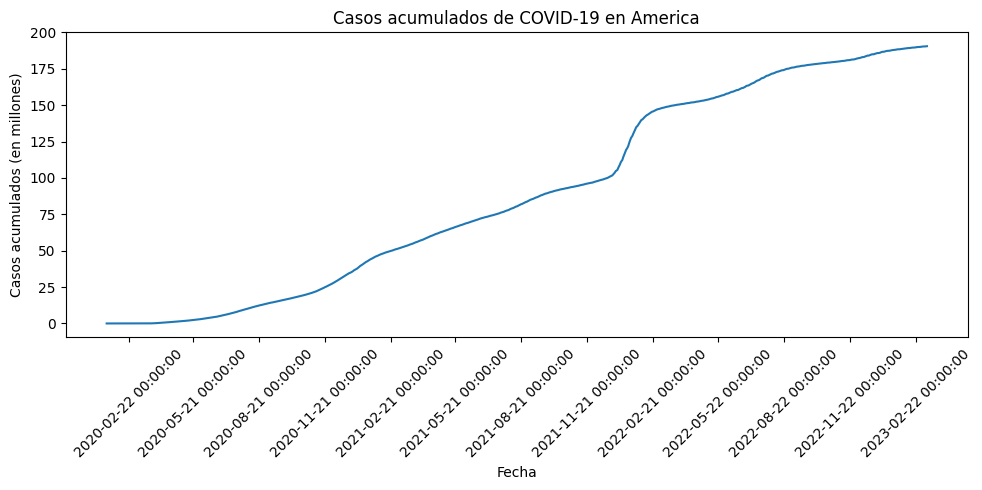

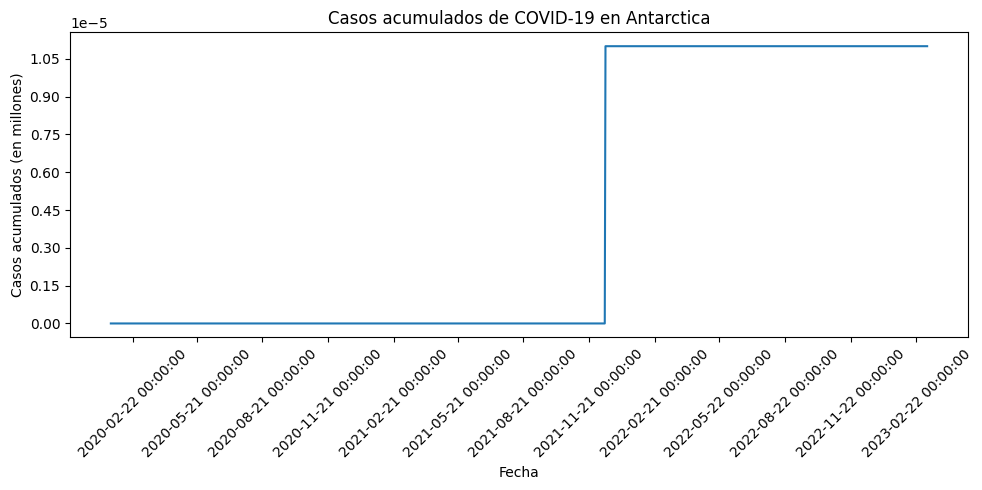

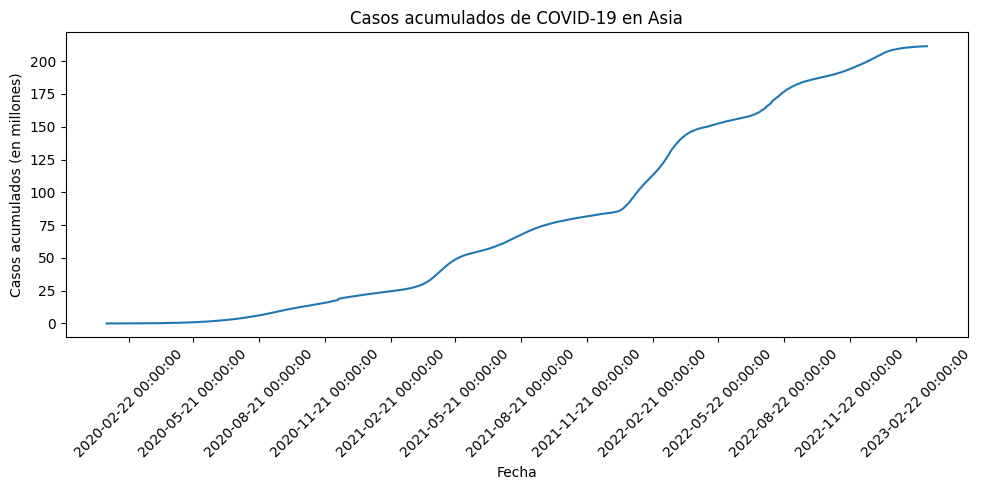

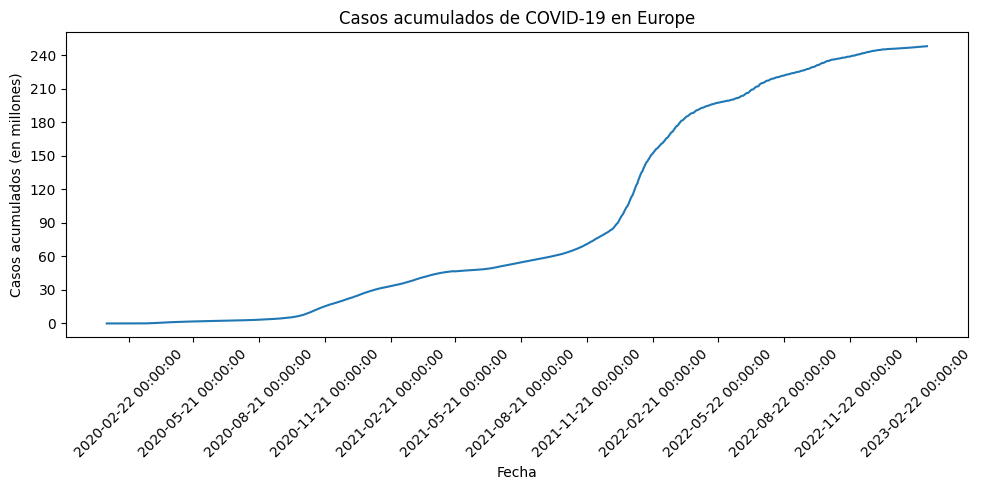

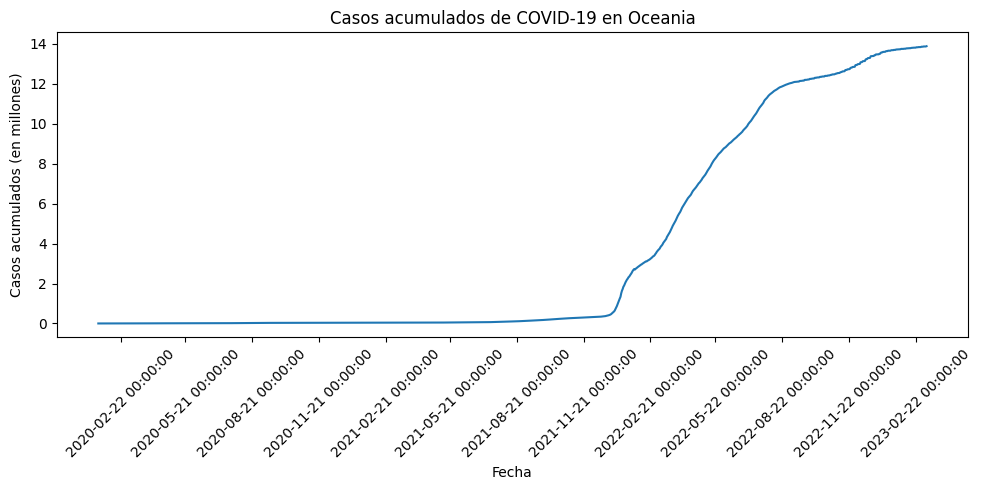

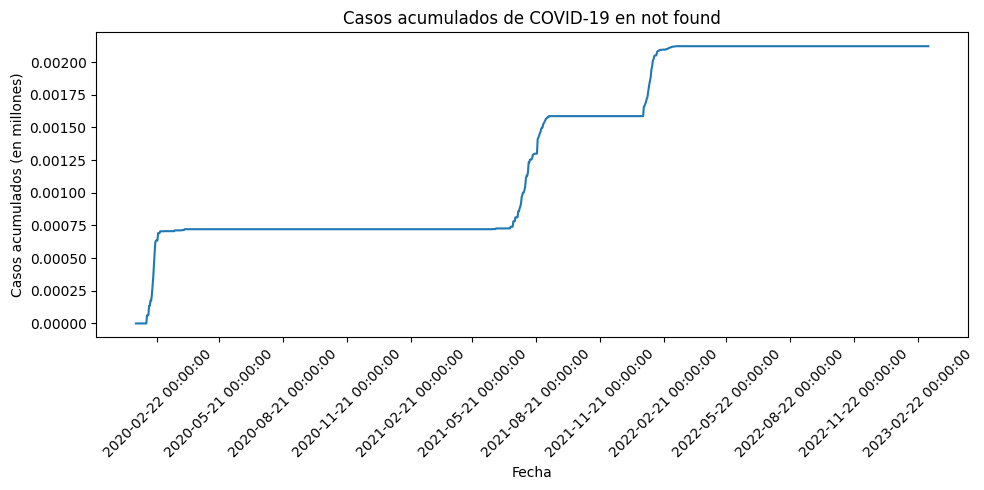

In [ ]:
# Primero, necesitamos asegurarnos de que las columnas de fecha estén en formato datetime
columnas_fecha = df_covid1.columns[4:-1]

# Luego, agrupamos por 'Continent' y sumamos los casos para cada fecha
df_casos_por_continente = df_covid1.groupby('Continent')[columnas_fecha].sum()

# Ahora 'df_casos_por_continente' contiene los casos acumulados históricos para cada continente

# Para cada continente, creamos un gráfico de línea
for continente in df_casos_por_continente.index:
    fig, ax = plt.subplots(figsize=(10,5))

    # Convertimos los casos a millones
    casos_en_millones = df_casos_por_continente.loc[continente] / 1e6

    # Graficamos los datos
    ax.plot(df_casos_por_continente.columns.astype(str), casos_en_millones)

    # Configuramos las etiquetas de los ejes
    ax.set_title('Casos acumulados de COVID-19 en ' + continente)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Casos acumulados (en millones)')

    # Configuramos el eje X para que muestre las fechas en intervalos de 3 meses
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    # Configuramos el eje Y para que muestre números enteros
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Rotamos las etiquetas del eje X para mejorar la legibilidad
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
# Asumiendo que el DataFrame transformado se llama df_covid_melted
descriptive_stats = df_covid2['Cases'].describe()
print(descriptive_stats)

count    3.303270e+05
mean     9.593836e+05
std      4.866034e+06
min      0.000000e+00
25%      6.800000e+02
50%      1.442900e+04
75%      2.285170e+05
max      1.038027e+08
Name: Cases, dtype: float64


<ipython-input-12-720759712eab>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_cases = df_covid_melted.groupby(df_covid_melted['Date'].dt.to_period('M')).sum()


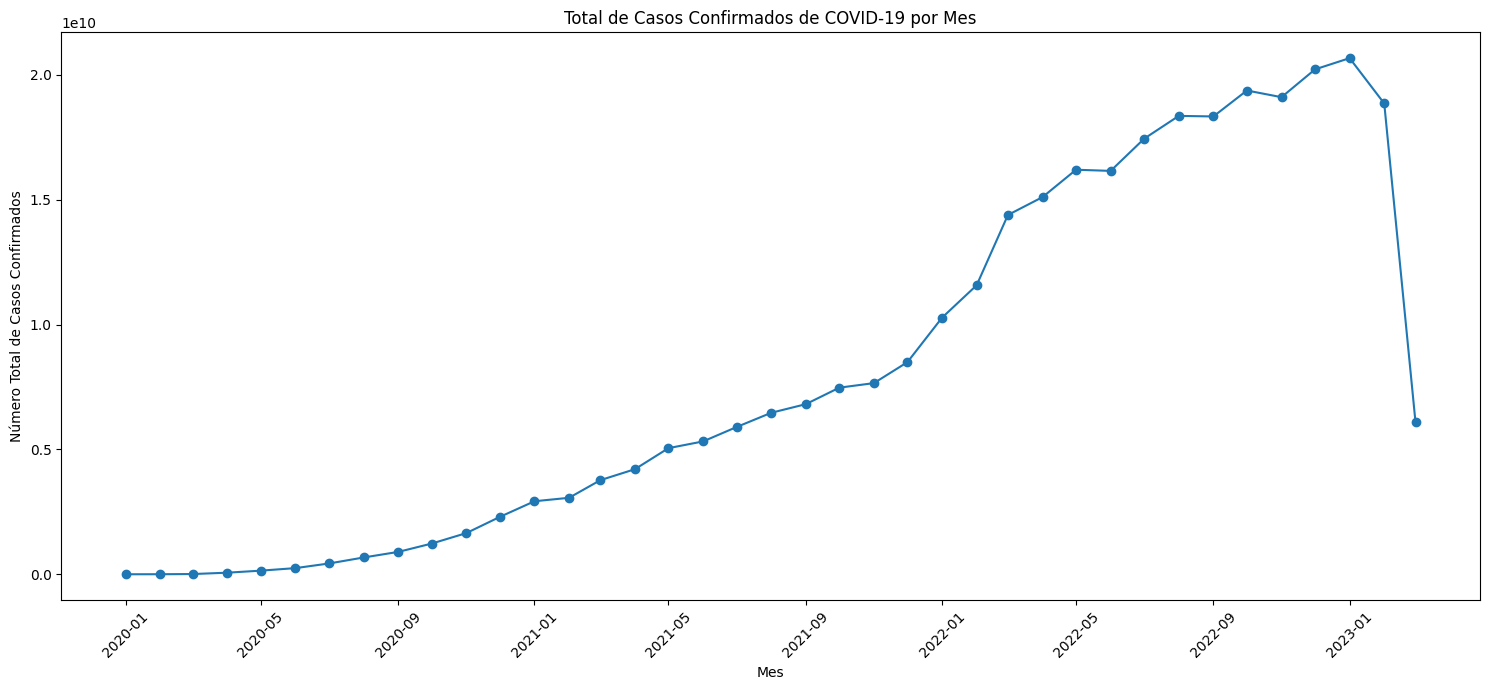

In [ ]:
# Asegúrate de que la columna 'Date' está en formato datetime
df_covid_melted['Date'] = pd.to_datetime(df_covid_melted['Date'])

# Agrupar por mes y obtener la suma de casos para cada mes
monthly_cases = df_covid_melted.groupby(df_covid_melted['Date'].dt.to_period('M')).sum()

# Resetear el índice para trabajar con columnas de fechas en formato de periodos
monthly_cases = monthly_cases.reset_index()

# Convertir la columna 'Date' de periodo a fecha
monthly_cases['Date'] = monthly_cases['Date'].dt.to_timestamp()

# Graficar
plt.figure(figsize=(15, 7))
plt.plot(monthly_cases['Date'], monthly_cases['Cases'], marker='o', linestyle='-')
plt.title('Total de Casos Confirmados de COVID-19 por Mes')
plt.xlabel('Mes')
plt.ylabel('Número Total de Casos Confirmados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
